In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils import plot_model
import matplotlib.image as mpimg

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print "X_train shape", X_train.shape
print "y_train shape", y_train.shape
print "X_test shape", X_test.shape
print "y_test shape", y_test.shape

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


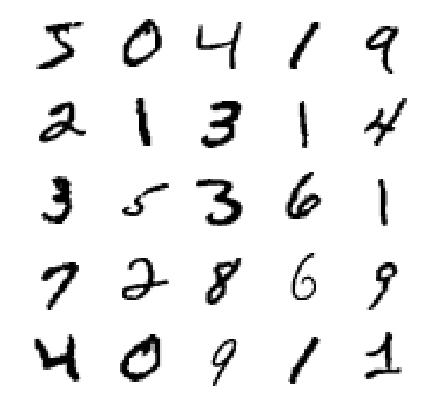

In [30]:
%time
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray_r', interpolation='none')
    #plt.title("Class {}".format(y_train[i]))
    plt.axis("off")

In [53]:
# reshape
X_train = X_train.reshape( X_train.shape[0], X_train.shape[1], X_train.shape[2], 1 )
X_test = X_test.reshape( X_test.shape[0], X_test.shape[1], X_test.shape[2], 1 )
#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

# normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print "Training set shape", X_train.shape
print "Testing set shape", X_test.shape

# convert labels to categories
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Training set shape (60000, 28, 28, 1)
Testing set shape (10000, 28, 28, 1)


In [61]:
# build the model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same') )
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [62]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total para

In [64]:
%%time
history = model.fit([X_train,], Y_train, batch_size=100, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 42s - loss: 0.0558 - acc: 0.9828    
CPU times: user 1min 46s, sys: 18.4 s, total: 2min 4s
Wall time: 42.9 s


In [65]:
score = model.evaluate(X_test, Y_test, verbose=0)
print 'Test loss and accuracy:', score

Test loss and accuracy: [0.03794078426444903, 0.98670000000000002]


(-0.5, 292.5, 838.5, -0.5)

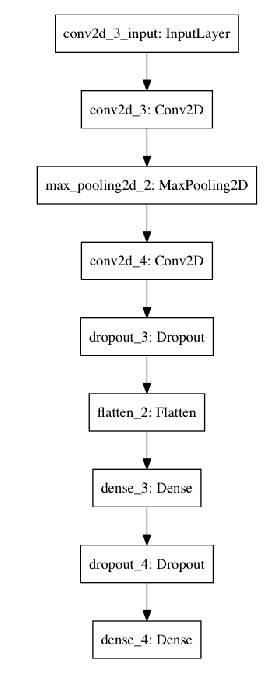

In [32]:
plot_model(model, to_file = "model.png")
modelplot = mpimg.imread("model.png")
plt.figure(figsize=(12,12))
plt.imshow(modelplot)
plt.axis("off")